Importing necessary Libraries

In [56]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
#%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns


# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm



Loading Data set

In [57]:
df=pd.read_csv('used_device_data.csv')

Data Overview

In [58]:
df.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_used_price  normalized_new_price  
0        127               4.307572              4.715100  
1        325               5.162097              5.519018  
2        162               5.111084              5.884631  
3        345               5.135387              5.630961  
4        293               4.389995              4.947837

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [60]:
df.describe()

screen_size  main_camera_mp  selfie_camera_mp   int_memory  \
count  3454.000000     3275.000000       3452.000000  3450.000000   
mean     13.713115        9.460208          6.554229    54.573099   
std       3.805280        4.815461          6.970372    84.972371   
min       5.080000        0.080000          0.000000     0.010000   
25%      12.700000        5.000000          2.000000    16.000000   
50%      12.830000        8.000000          5.000000    32.000000   
75%      15.340000       13.000000          8.000000    64.000000   
max      30.710000       48.000000         32.000000  1024.000000   

               ram      battery       weight  release_year    days_used  \
count  3450.000000  3448.000000  3447.000000   3454.000000  3454.000000   
mean      4.036122  3133.402697   182.751871   2015.965258   674.869716   
std       1.365105  1299.682844    88.413228      2.298455   248.580166   
min       0.020000   500.000000    69.000000   2013.000000    91.000000   
25%       4.000000  2100.000000   142.000000   2014.000000   533.500000   
50%       4.000000  3000.000000   160.000000   2015.500000   690.500000   
75%       4.000000  4000.000000   185.000000   2018.000000   868.750000   
max      12.000000  9720.000000   855.000000   2020.000000  1094.000000   

       normalized_used_price  normalized_new_price  
count            3454.000000           3454.000000  
mean                4.364712              5.233107  
std                 0.588914              0.683637  
min                 1.536867              2.901422  
25%                 4.033931              4.790342  
50%                 4.405133              5.245892  
75%                 4.755700              5.673718  
max                 6.619433              7.847841

Exploratory Data Analysis (EDA)


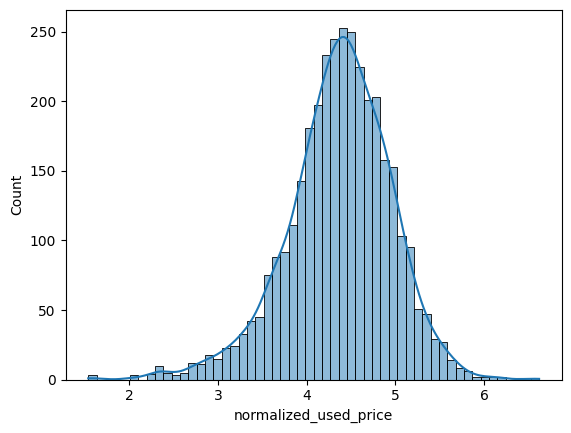

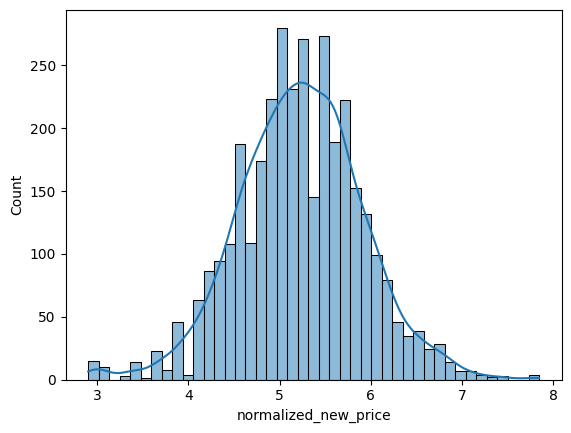

In [61]:
sns.histplot(data=df,x='normalized_used_price',kde=True)
plt.show()
sns.histplot(data=df,x='normalized_new_price',kde=True)
plt.show()


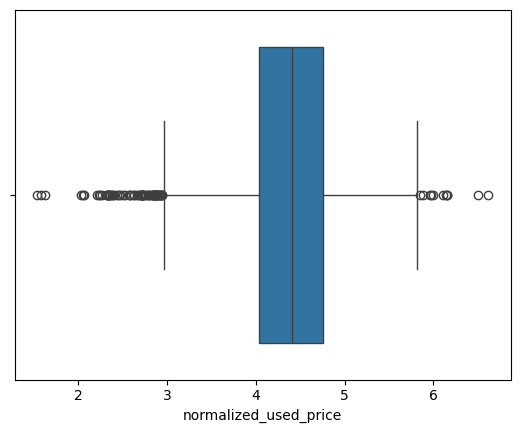

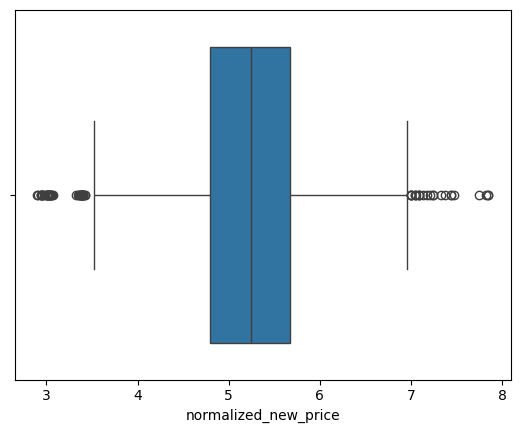

In [62]:
sns.boxplot(data=df,x='normalized_used_price')
plt.show()
sns.boxplot(data=df,x='normalized_new_price')
plt.show()

In [63]:
df['os'].value_counts(normalize=True)*100

os
Android    93.051534
Others      3.966416
Windows     1.939780
iOS         1.042270
Name: proportion, dtype: float64

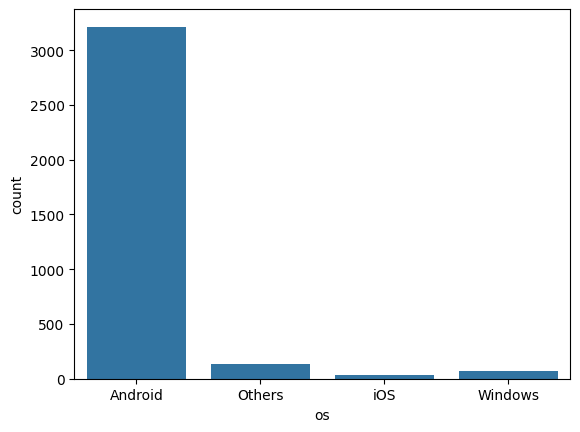

In [64]:
sns.countplot(data=df,x='os')
plt.show()

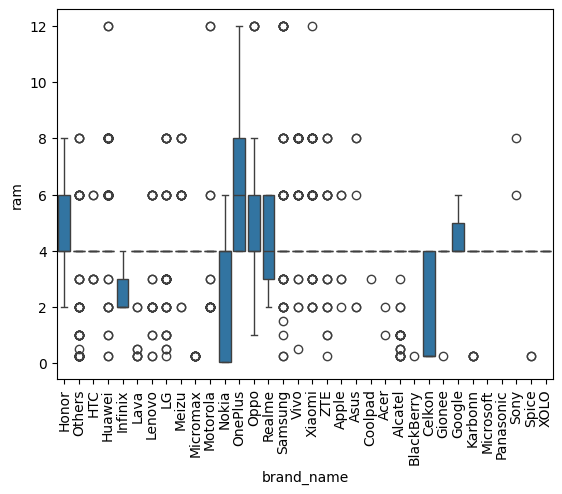

In [65]:
#The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
sns.boxplot(data=df,x='brand_name',y='ram')
plt.xticks(rotation=90)
plt.show()



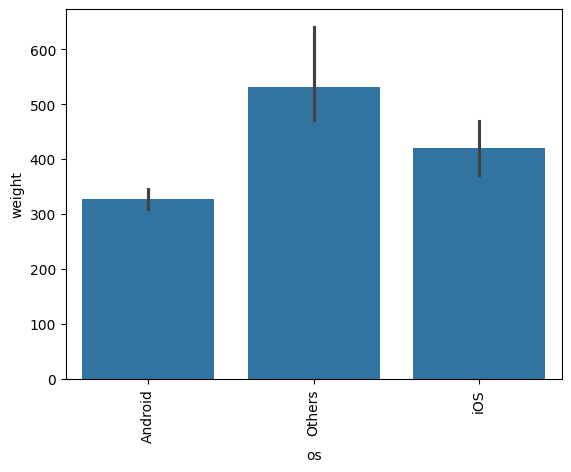

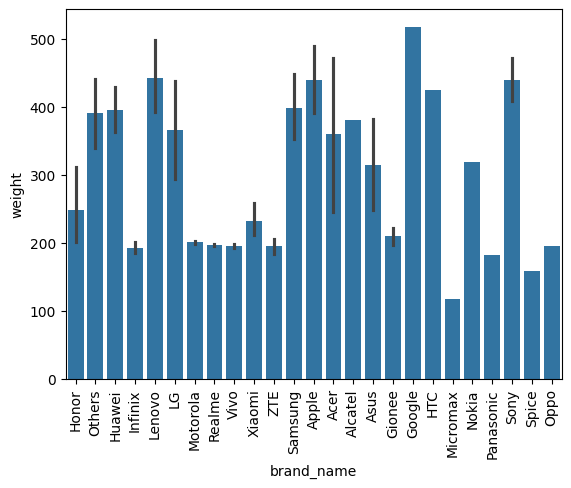

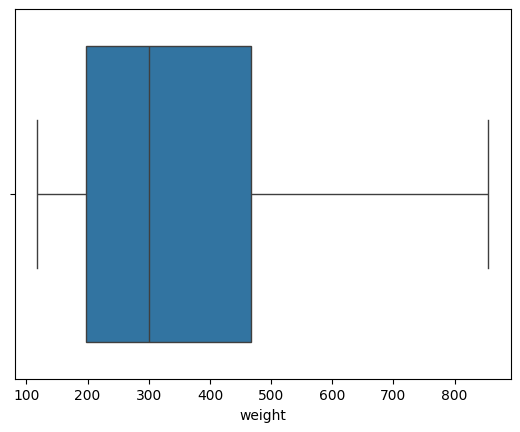

In [66]:
# How does the weight vary for phones and tablets offering large batteries(more than 4500 mAh)?
w=df[df['battery']>4500]
sns.barplot(data=w,x='os',y='weight')
plt.xticks(rotation=90)
plt.show()
sns.barplot(data=w,x='brand_name',y='weight')
plt.xticks(rotation=90)
plt.show()
sns.boxplot(data=w,x='weight')
plt.show()

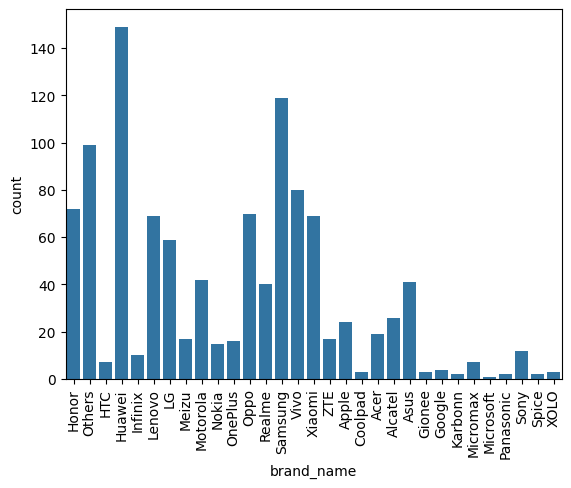

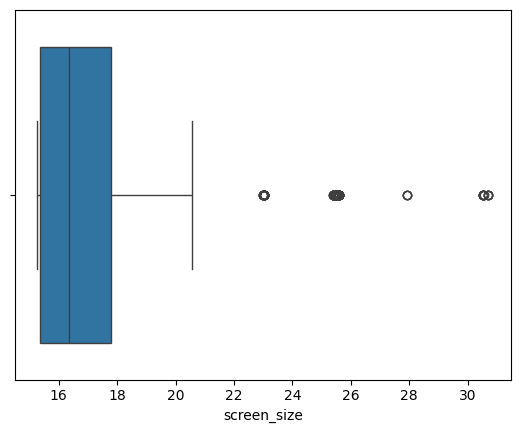

In [67]:
#How many phones and tablets are available across different brands with a screen size larger than 6 inches(15.24 cm)?
w=df[df['screen_size']>15.24]
sns.countplot(data=w,x='brand_name')
plt.xticks(rotation=90)
plt.show()
sns.boxplot(data=w,x='screen_size')
plt.show()


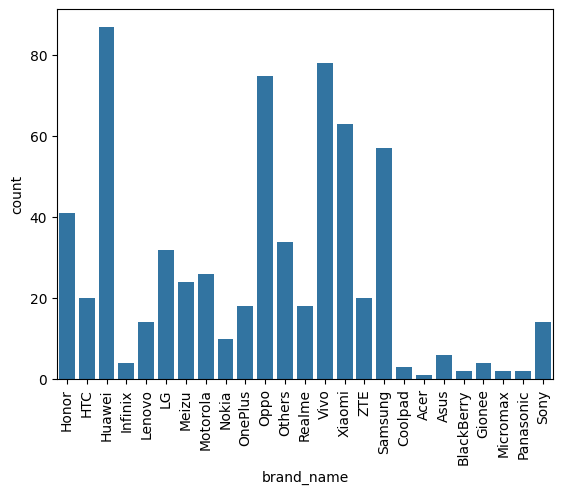

In [68]:
#What is the distribution of devices offering greater than 8MP selfie cameras across brands?
w=df[df['selfie_camera_mp']>8]
sns.countplot(data=w,x='brand_name')
plt.xticks(rotation=90)
plt.show()

Univariate Analysis

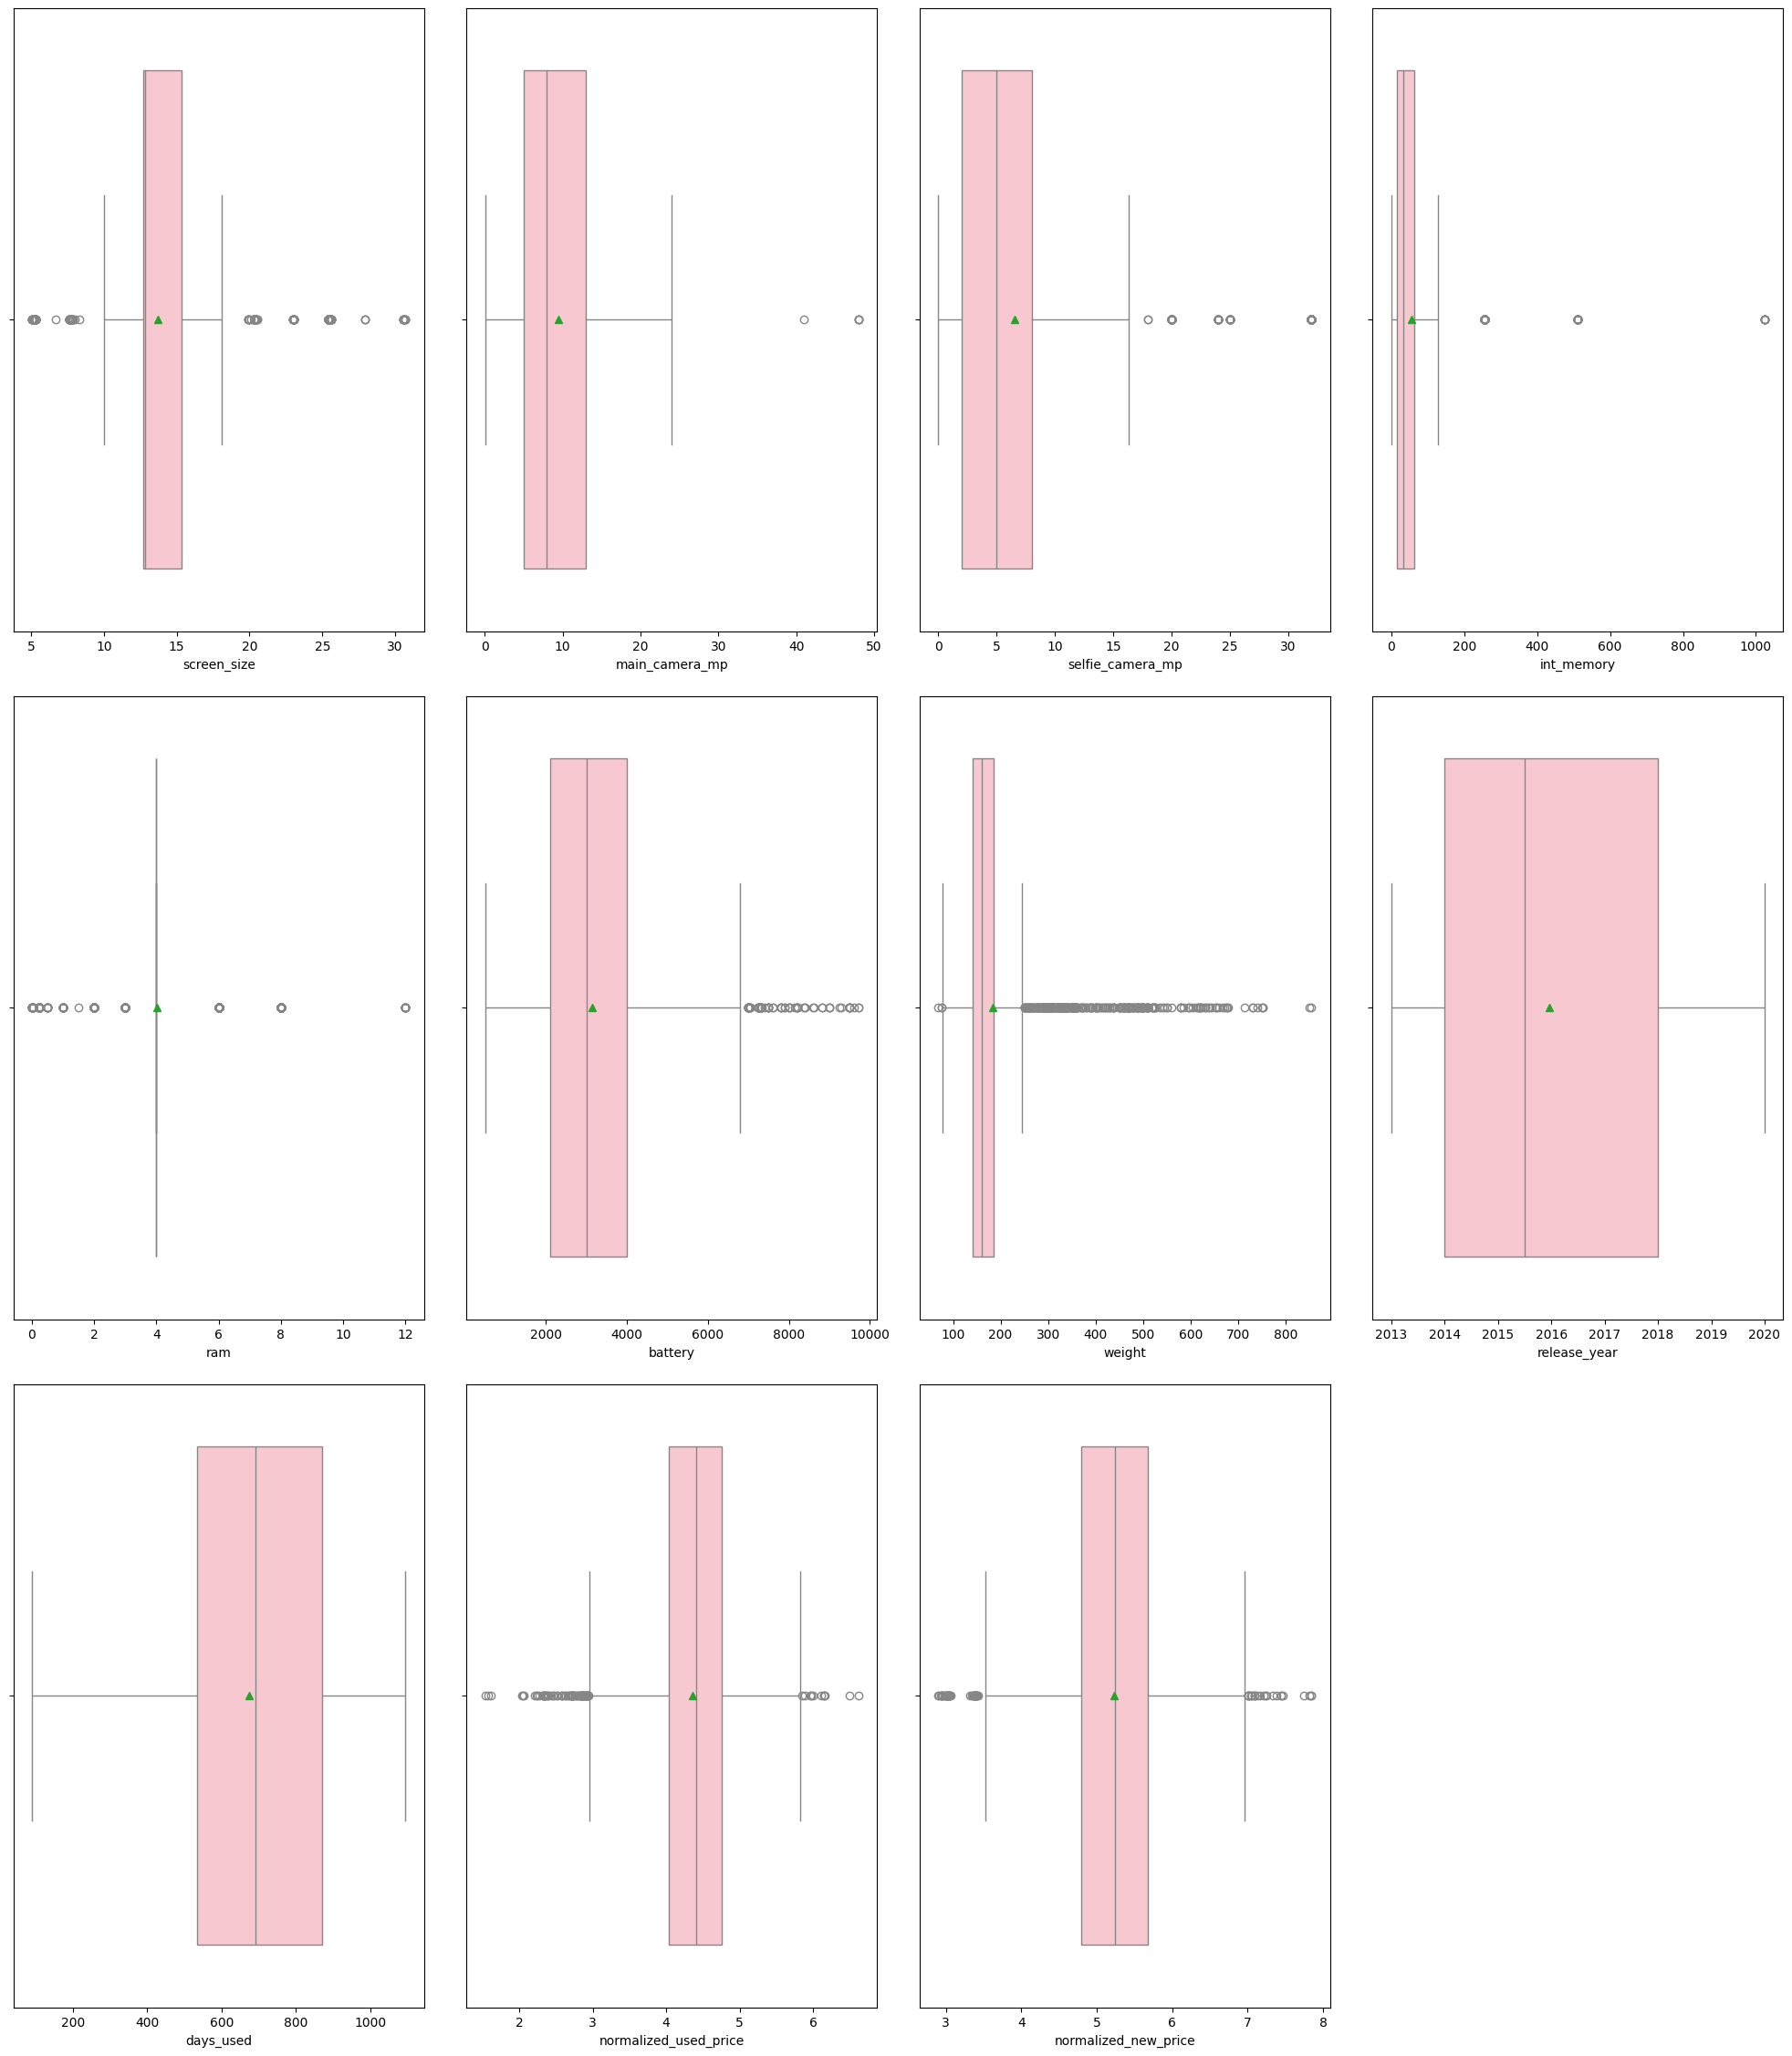

In [69]:
plt.figure(figsize=(20,30))
cols=df.select_dtypes(include=np.number).columns.tolist()
for i, var in enumerate(cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(data=df,x=var, showmeans=True,color='pink')
    plt.tight_layout(pad=2)
plt.show()


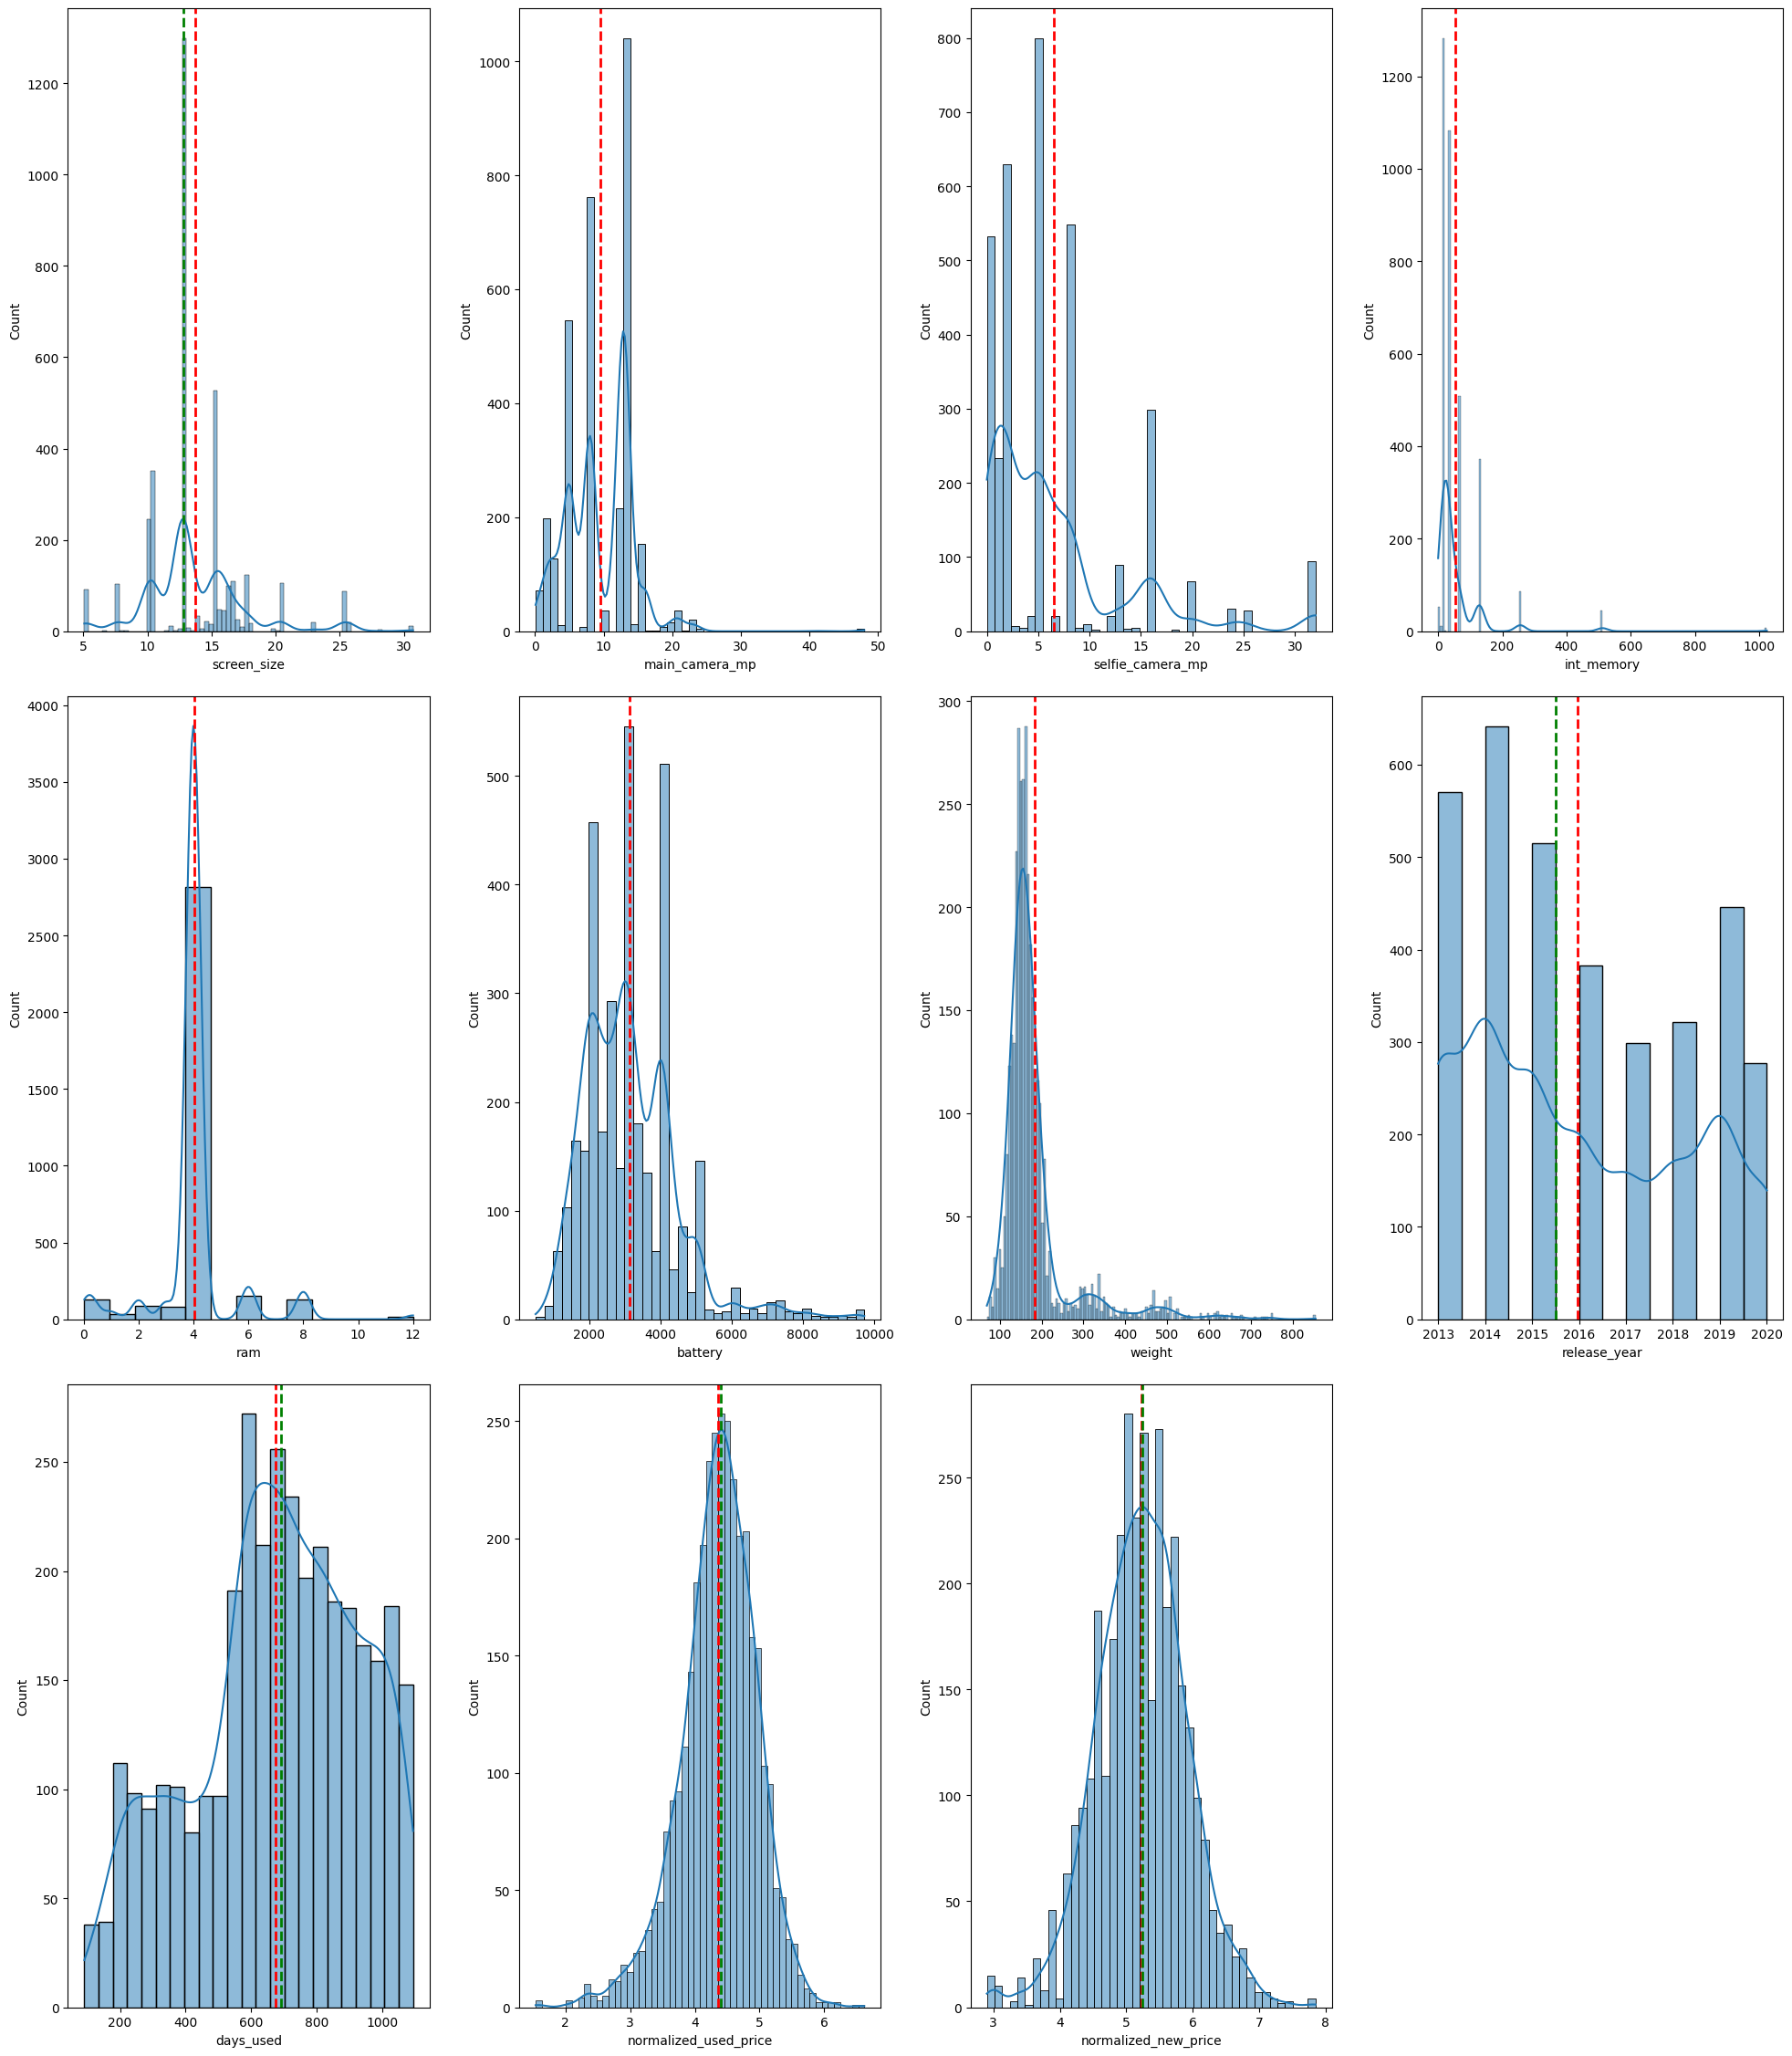

In [70]:
plt.figure(figsize=(20,30))
cols=df.select_dtypes(include=np.number).columns.tolist()
for i, var in enumerate(cols):
    mean_val = np.mean(df[var])
    median_val = np.median(df[var])
    plt.subplot(4,4,i+1)
    sns.histplot(data=df,x=var,kde=True)
    plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2)
    plt.axvline(median_val, color='green', linestyle='dashed', linewidth=2)
    plt.tight_layout(pad=2)
plt.show()

Bivariate Analysis

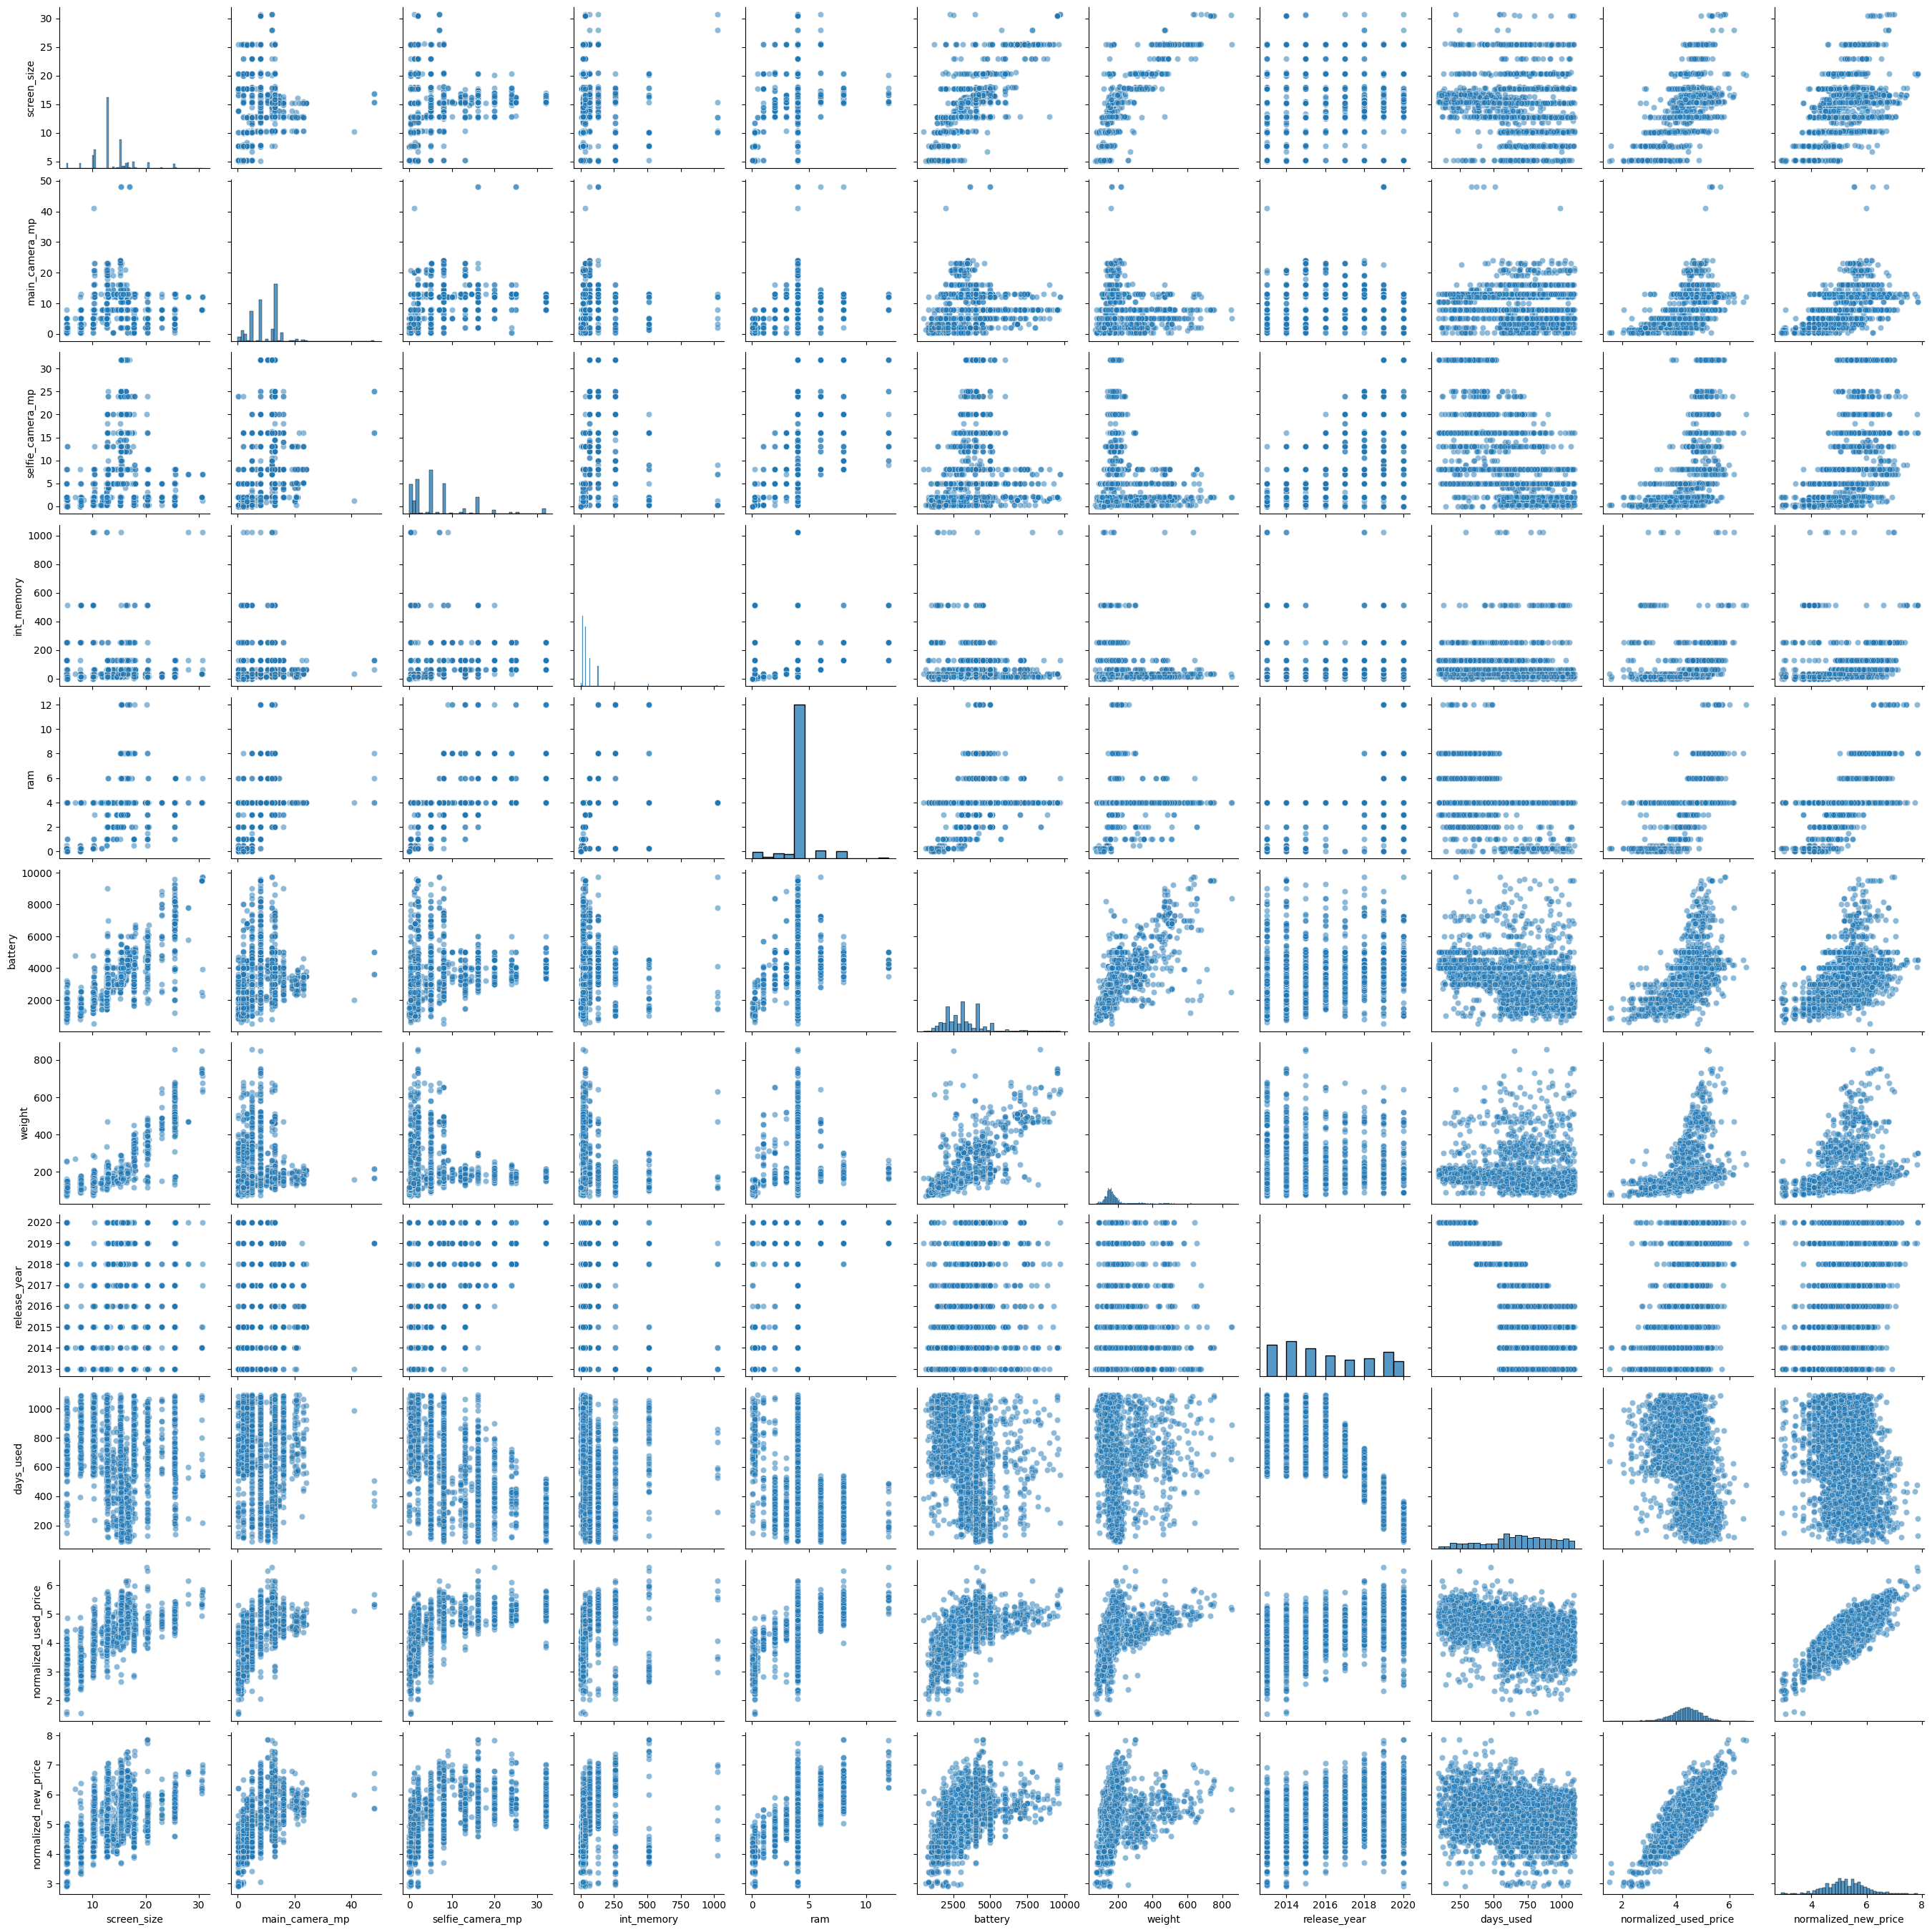

In [72]:
sns.pairplot(df,kind='scatter',plot_kws={'alpha':0.5})
plt.show()

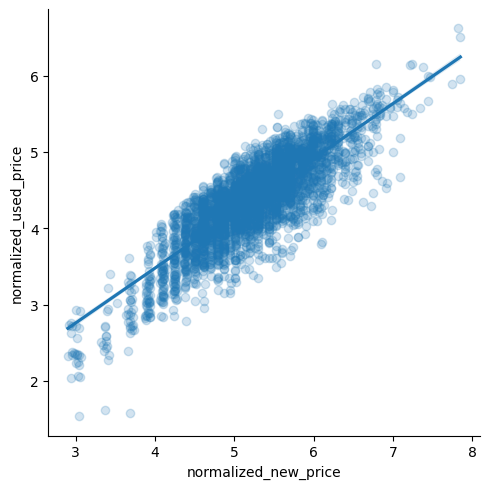

In [73]:
sns.lmplot(x='normalized_new_price',y='normalized_used_price',data=df,scatter_kws={'alpha':0.2})
plt.show()

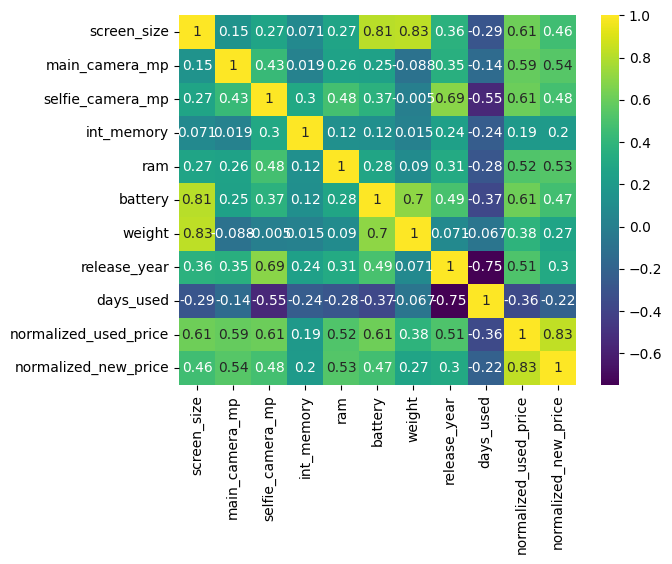

In [71]:
#Which attributes are highly correlated with the normalized price of a used device?
n=df.drop(['brand_name','os','4g','5g'],axis=1)
sns.heatmap(n.corr(),annot=True,cmap='viridis')
plt.show()

Data Processing

In [74]:
#checking for duplicate values
df.isnull().sum()


brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [75]:
cols=['main_camera_mp','selfie_camera_mp','int_memory','ram','battery','weight']
for col in cols:
    df[col]=df[col].fillna(df.groupby(['brand_name','release_year'])[col].transform('mean'))        
df.isnull().sum()


brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [76]:
for col in cols:
    df[col]=df[col].fillna(df.groupby('brand_name')[col].transform('mean'))
df.isnull().sum()


brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [77]:
for col in cols:
    df[col]=df[col].fillna(df[col].mean())
df.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

In [78]:
#checking if dataset contains any duplicate values
df.duplicated().sum()

np.int64(0)

Feature Engineering

In [79]:
#changing the release_year to years_since_released
df['years_since_released']=2025-df['release_year']
#df['years_since_released']=df['release_year'].apply(lambda x:2025-x)
df.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_used_price  normalized_new_price  \
0        127               4.307572              4.715100   
1        325               5.162097              5.519018   
2        162               5.111084              5.884631   
3        345               5.135387              5.630961   
4        293               4.389995              4.947837   

   years_since_released  
0                     5  
1                     5  
2                     5  
3                     5  
4                     5

In [80]:
df.drop('release_year',axis=1,inplace=True)
df.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_used_price  normalized_new_price  years_since_released  
0               4.307572              4.715100                     5  
1               5.162097              5.519018                     5  
2               5.111084              5.884631                     5  
3               5.135387              5.630961                     5  
4               4.389995              4.947837                     5

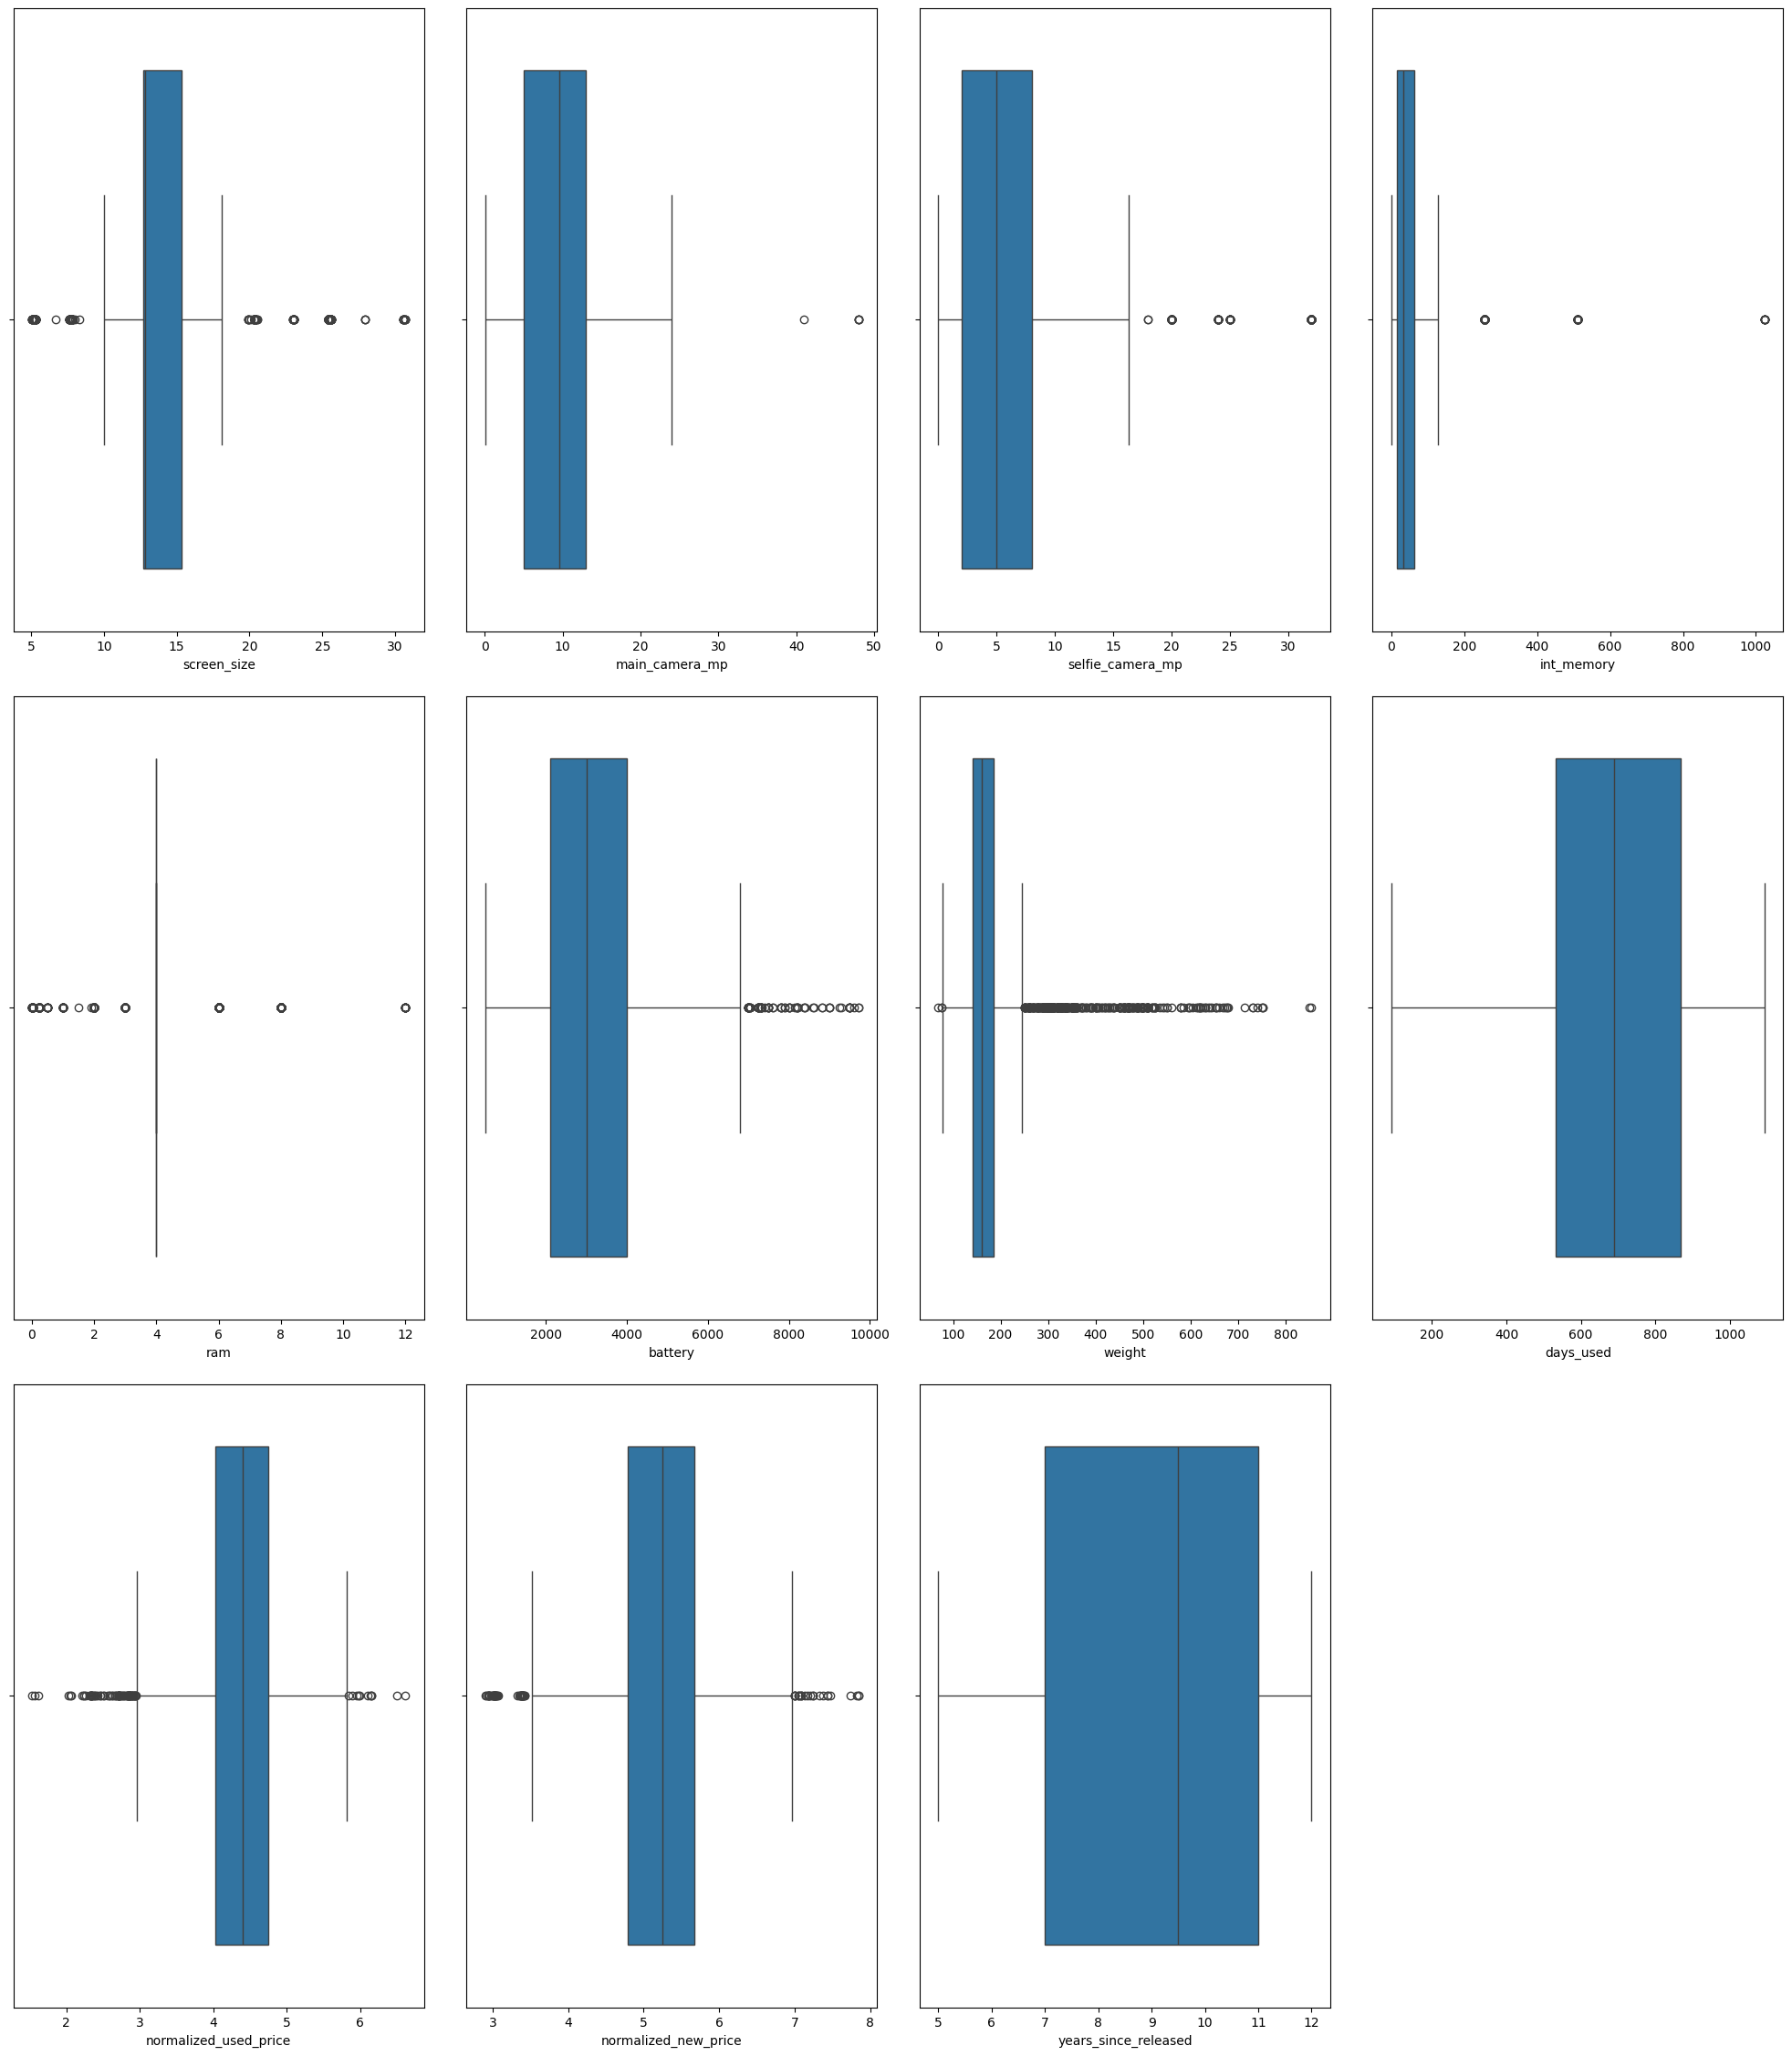

In [81]:
#checking for outliers
plt.figure(figsize=(20,30))
cols=df.select_dtypes(include=np.number).columns.tolist()
for i, var in enumerate(cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(data=df,x=var)
    plt.tight_layout(pad=2)
plt.show()

In [82]:
#converting categorical data to numerical data
df=pd.get_dummies(df,columns=df.select_dtypes(include=['object','category']).columns.tolist(),drop_first=True)
df.head()                  

screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  battery  \
0        14.50            13.0               5.0        64.0  3.0   3020.0   
1        17.30            13.0              16.0       128.0  8.0   4300.0   
2        16.69            13.0               8.0       128.0  8.0   4200.0   
3        25.50            13.0               8.0        64.0  6.0   7250.0   
4        15.32            13.0               8.0        64.0  3.0   5000.0   

   weight  days_used  normalized_used_price  normalized_new_price  ...  \
0   146.0        127               4.307572              4.715100  ...   
1   213.0        325               5.162097              5.519018  ...   
2   213.0        162               5.111084              5.884631  ...   
3   480.0        345               5.135387              5.630961  ...   
4   185.0        293               4.389995              4.947837  ...   

   brand_name_Spice  brand_name_Vivo  brand_name_XOLO  brand_name_Xiaomi  \
0             False            False            False              False   
1             False            False            False              False   
2             False            False            False              False   
3             False            False            False              False   
4             False            False            False              False   

   brand_name_ZTE  os_Others  os_Windows  os_iOS  4g_yes  5g_yes  
0           False      False       False   False    True   False  
1           False      False       False   False    True    True  
2           False      False       False   False    True    True  
3           False      False       False   False    True    True  
4           False      False       False   False    True   False  

[5 rows x 49 columns]

In [83]:
#explicitly mapping boolean values to 0 and 1
bool_cols=df.select_dtypes(include='bool').columns.tolist()
for col in bool_cols:
    df[col]=df[col].map({True:1,False:0})
df.head()


screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  battery  \
0        14.50            13.0               5.0        64.0  3.0   3020.0   
1        17.30            13.0              16.0       128.0  8.0   4300.0   
2        16.69            13.0               8.0       128.0  8.0   4200.0   
3        25.50            13.0               8.0        64.0  6.0   7250.0   
4        15.32            13.0               8.0        64.0  3.0   5000.0   

   weight  days_used  normalized_used_price  normalized_new_price  ...  \
0   146.0        127               4.307572              4.715100  ...   
1   213.0        325               5.162097              5.519018  ...   
2   213.0        162               5.111084              5.884631  ...   
3   480.0        345               5.135387              5.630961  ...   
4   185.0        293               4.389995              4.947837  ...   

   brand_name_Spice  brand_name_Vivo  brand_name_XOLO  brand_name_Xiaomi  \
0                 0                0                0                  0   
1                 0                0                0                  0   
2                 0                0                0                  0   
3                 0                0                0                  0   
4                 0                0                0                  0   

   brand_name_ZTE  os_Others  os_Windows  os_iOS  4g_yes  5g_yes  
0               0          0           0       0       1       0  
1               0          0           0       0       1       1  
2               0          0           0       0       1       1  
3               0          0           0       0       1       1  
4               0          0           0       0       1       0  

[5 rows x 49 columns]

Building Linear Regression Model


In [84]:
#defining predictors and traget variable
X=df.drop('normalized_used_price',axis=1)
y=df['normalized_used_price']

In [85]:
print(X.shape)
print(y.shape)

(3454, 48)
(3454,)


In [86]:
#adding constant manually as statsmodels doesnot add constant on its own
X=sm.add_constant(X)

In [87]:
#spliting the dataset into train and testing set in test size 0.30
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [88]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


In [89]:
#fit/train the data with statsmodels
olsmodel=sm.OLS(y_train,X_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.849
Model:                               OLS   Adj. R-squared:                  0.846
Method:                    Least Squares   F-statistic:                     277.4
Date:                   Mon, 27 Jan 2025   Prob (F-statistic):               0.00
Time:                           10:46:47   Log-Likelihood:                 126.14
No. Observations:                   2417   AIC:                            -154.3
Df Residuals:                       2368   BIC:                             129.4
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [90]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    y_pred = model.predict(predictors)

    r2 = r2_score(target, y_pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, y_pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, y_pred))  # to compute RMSE
    mae = mean_absolute_error(target, y_pred)  # to compute MAE
    mape = mape_score(target, y_pred)  # to compute MAPE
    mse=mean_squared_error(target,y_pred)


    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
            "MSE":mse
        },
        index=[0],
    )

    return df_perf

In [91]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, X_test, y_test)
olsmodel_test_perf

Test Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE       MSE
0  0.238987  0.188661   0.832281        0.823954  4.512546  0.057115

Checking Linear Regression Assumptions


In [92]:
#checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def check_vif(predictors):
    vif=pd.DataFrame()
    vif['feature']=predictors.columns
    vif['VIF']=[variance_inflation_factor(predictors.values,i)
            for i in range(predictors.shape[1])]
    print(vif)
check_vif(X_train)


                  feature         VIF
0                   const  265.235338
1             screen_size    8.267208
2          main_camera_mp    2.441760
3        selfie_camera_mp    2.870106
4              int_memory    1.362897
5                     ram    2.280539
6                 battery    4.058464
7                  weight    6.416315
8               days_used    2.580558
9    normalized_new_price    3.240086
10   years_since_released    4.880499
11     brand_name_Alcatel    3.458624
12       brand_name_Apple   11.194254
13        brand_name_Asus    3.651767
14  brand_name_BlackBerry    1.623856
15      brand_name_Celkon    1.873748
16     brand_name_Coolpad    1.575087
17      brand_name_Gionee    2.076651
18      brand_name_Google    1.388122
19         brand_name_HTC    3.460295
20       brand_name_Honor    3.560563
21      brand_name_Huawei    6.396085
22     brand_name_Infinix    1.191416
23     brand_name_Karbonn    1.628728
24          brand_name_LG    5.354505
25        br

In [94]:
# Checking the effect of dropping the columns showing high multicollinearity on model performance 
def check_multicollinear(predictors,target,high_vif_cols):
    adj_r2=[]
    rmse=[]
    for cols in high_vif_cols:
        #x_train = predictors[[col for col in predictors.columns if col not in high_vif_cols]]
        x_train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]
        
       
        olsmodel = sm.OLS(target, x_train).fit()
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))
    err_val = pd.DataFrame(
            {
                "col": high_vif_cols,
                "Adj. R-squared after_dropping col": adj_r2,
                "RMSE after dropping col": rmse,
            }).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    err_val.reset_index(drop=True, inplace=True)
    return err_val


In [95]:
cols=['screen_size','weight', 'brand_name_Others','brand_name_Samsung','os_iOS','brand_name_Huawei','brand_name_LG','brand_name_Apple']
check_multicollinear(X_train,y_train,cols)


col  Adj. R-squared after_dropping col  \
0              os_iOS                           0.846014   
1    brand_name_Apple                           0.846009   
2       brand_name_LG                           0.845905   
3   brand_name_Huawei                           0.845902   
4  brand_name_Samsung                           0.845891   
5   brand_name_Others                           0.845856   
6              weight                           0.843669   
7         screen_size                           0.841506   

   RMSE after dropping col  
0                 0.231982  
1                 0.231986  
2                 0.232064  
3                 0.232067  
4                 0.232074  
5                 0.232101  
6                 0.233742  
7                 0.235353

In [96]:
#dropping os_iOS to remove multicllinearity 
cols_to_drop='brand_name_Apple'
X_train=X_train.loc[:,~X_train.columns.str.startswith(cols_to_drop)]
X_test=X_test.loc[:,~X_test.columns.str.startswith(cols_to_drop)]
check_vif(X_train)



                  feature         VIF
0                   const  264.362218
1             screen_size    8.211058
2          main_camera_mp    2.441255
3        selfie_camera_mp    2.842828
4              int_memory    1.362704
5                     ram    2.269427
6                 battery    4.054385
7                  weight    6.403930
8               days_used    2.579837
9    normalized_new_price    3.223802
10   years_since_released    4.872671
11     brand_name_Alcatel    3.259928
12        brand_name_Asus    3.425740
13  brand_name_BlackBerry    1.552592
14      brand_name_Celkon    1.823235
15     brand_name_Coolpad    1.534053
16      brand_name_Gionee    1.996963
17      brand_name_Google    1.351230
18         brand_name_HTC    3.275810
19       brand_name_Honor    3.348338
20      brand_name_Huawei    5.927980
21     brand_name_Infinix    1.178253
22     brand_name_Karbonn    1.592841
23          brand_name_LG    4.999425
24        brand_name_Lava    1.776899
25      bran

In [97]:
cols=['screen_size','weight','brand_name_Huawei','brand_name_Others','brand_name_Samsung']
check_multicollinear(X_train,y_train,cols)


col  Adj. R-squared after_dropping col  \
0   brand_name_Huawei                           0.845966   
1  brand_name_Samsung                           0.845956   
2   brand_name_Others                           0.845920   
3              weight                           0.843714   
4         screen_size                           0.841563   

   RMSE after dropping col  
0                 0.232018  
1                 0.232026  
2                 0.232053  
3                 0.233708  
4                 0.235311

In [98]:
cols_to_drop='brand_name_Huawei'
X_train=X_train.loc[:,~X_train.columns.str.startswith(cols_to_drop)]
X_test=X_test.loc[:,~X_test.columns.str.startswith(cols_to_drop)]

check_vif(X_train)




                  feature         VIF
0                   const  197.165240
1             screen_size    8.207623
2          main_camera_mp    2.441148
3        selfie_camera_mp    2.837717
4              int_memory    1.360540
5                     ram    2.269420
6                 battery    4.049528
7                  weight    6.399444
8               days_used    2.579651
9    normalized_new_price    3.220844
10   years_since_released    4.872645
11     brand_name_Alcatel    1.403562
12        brand_name_Asus    1.382653
13  brand_name_BlackBerry    1.135060
14      brand_name_Celkon    1.293384
15     brand_name_Coolpad    1.091392
16      brand_name_Gionee    1.174860
17      brand_name_Google    1.069847
18         brand_name_HTC    1.382457
19       brand_name_Honor    1.367194
20     brand_name_Infinix    1.042740
21     brand_name_Karbonn    1.137312
22          brand_name_LG    1.634606
23        brand_name_Lava    1.165788
24      brand_name_Lenovo    1.541417
25       bra

In [99]:
cols=['screen_size','weight']
check_multicollinear(X_train,y_train,cols)


col  Adj. R-squared after_dropping col  RMSE after dropping col
0       weight                           0.843644                 0.233760
1  screen_size                           0.841492                 0.235364

In [100]:
cols_to_drop='screen_size'
X_train=X_train.loc[:,~X_train.columns.str.startswith(cols_to_drop)]
X_test=X_test.loc[:,~X_test.columns.str.startswith(cols_to_drop)]
check_vif(X_train)

                  feature         VIF
0                   const  167.728433
1          main_camera_mp    2.440872
2        selfie_camera_mp    2.832695
3              int_memory    1.354844
4                     ram    2.269181
5                 battery    3.752106
6                  weight    2.847601
7               days_used    2.566639
8    normalized_new_price    3.166189
9    years_since_released    4.727538
10     brand_name_Alcatel    1.401579
11        brand_name_Asus    1.379825
12  brand_name_BlackBerry    1.134364
13      brand_name_Celkon    1.292674
14     brand_name_Coolpad    1.090708
15      brand_name_Gionee    1.166961
16      brand_name_Google    1.067661
17         brand_name_HTC    1.379211
18       brand_name_Honor    1.365423
19     brand_name_Infinix    1.042528
20     brand_name_Karbonn    1.136454
21          brand_name_LG    1.627115
22        brand_name_Lava    1.165777
23      brand_name_Lenovo    1.538901
24       brand_name_Meizu    1.209879
25    brand_

In [101]:
#fitting the data after removing multicollinearity
olsmodel=sm.OLS(y_train,X_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.844
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     286.0
Date:                   Mon, 27 Jan 2025   Prob (F-statistic):               0.00
Time:                           10:50:36   Log-Likelihood:                 90.134
No. Observations:                   2417   AIC:                            -88.27
Df Residuals:                       2371   BIC:                             178.1
Df Model:                             45                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


Dealing with high P values

In [103]:
#removing features with p_value greater than 0.5
cols = X_train.columns.tolist()  # Get a list of column names

# Setting the initial max p-value
max_p_value = 1.0
threshold = 0.05  # Define p-value threshold

while len(cols) > 0:
    # Define the train set with the current columns
    x_train_aux = X_train[cols]

    # Adding a constant to the model for the intercept
    x_train_aux = sm.add_constant(x_train_aux)

    # Fitting the OLS model
    model = sm.OLS(y_train, x_train_aux).fit()

    # Get the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)  # Find the maximum p-value

    # Name of the feature with the highest p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > threshold:
        # Drop the feature with the highest p-value
        cols.remove(feature_with_p_max)
    else:
        # All p-values are below threshold, stop the loop
        break

# Store the selected features
selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'weight', 'normalized_new_price', 'years_since_released', 'brand_name_Asus', 'brand_name_Celkon', 'brand_name_Nokia', 'brand_name_Xiaomi', 'os_Others', '4g_yes', '5g_yes']


In [104]:
#updating train and test datasets with only selected features
X_train=X_train[selected_features]
X_test=X_test[selected_features]

In [105]:
olsmodel=sm.OLS(y_train,X_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.843
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     921.8
Date:                   Mon, 27 Jan 2025   Prob (F-statistic):               0.00
Time:                           10:52:02   Log-Likelihood:                 79.594
No. Observations:                   2417   AIC:                            -129.2
Df Residuals:                       2402   BIC:                            -42.33
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [106]:
#testing performance of dataset with new selected features
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, X_test, y_test)
olsmodel_test_perf

Test Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE      MSE
0  0.240541  0.189391   0.830093        0.827596  4.541333  0.05786

Test for Linearity

In [107]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Predicted Values"] = olsmodel.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel.resid  # residuals

df_pred.head()

Actual Values  Predicted Values  Residuals
1744       4.261975          4.331470  -0.069494
3141       4.175156          3.913484   0.261672
1233       4.117410          4.426274  -0.308864
3046       3.782597          3.877856  -0.095258
2649       3.981922          3.888998   0.092924

RuntimeError: `lowess=True` requires statsmodels, an optional dependency, to be installed.

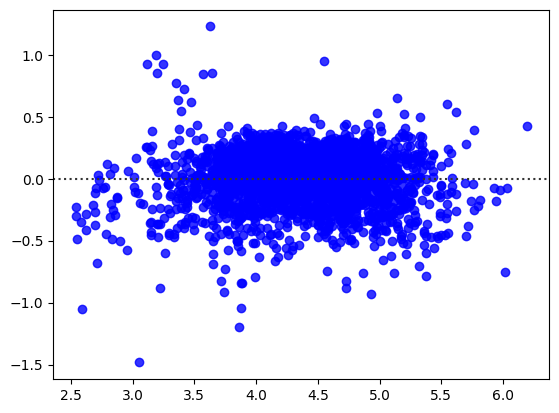

In [108]:
#  REsidual plot for the Predicted values vs residuals to check linearity

sns.residplot( data=df_pred, x="Predicted Values", y="Residuals", color="blue", lowess=True)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Predicted vs Residual plot")
plt.show()

Test For Normality


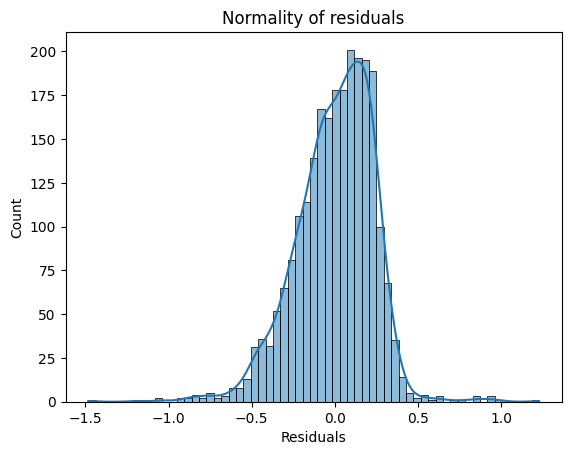

In [110]:
#histogram for residuals
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

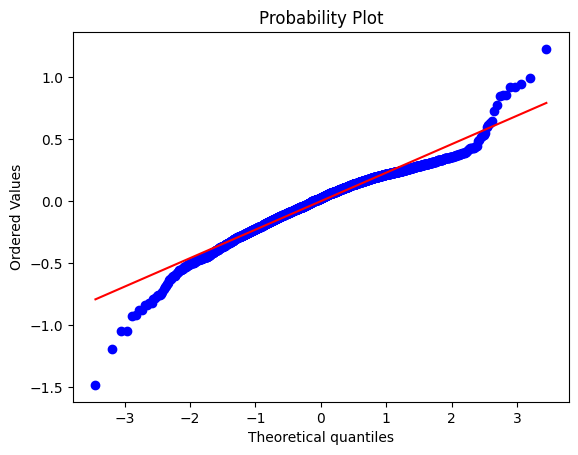

In [111]:
import scipy.stats as stats
stats.probplot(df_pred['Residuals'],dist='norm',plot=plt )
plt.show()

In [112]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=np.float64(0.9649669821290006), pvalue=np.float64(8.790640188232544e-24))

Test For Homoscedacity

In [114]:

import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train)
lzip(name, test)

[('F statistic', np.float64(0.9485456177187723)),
 ('p-value', np.float64(0.8191750280200132))]

Final Model Summary

In [116]:
#comparing preicted and actual values
pred = olsmodel.predict(X_test)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

Actual  Predicted
1174  4.553772   4.502079
2247  4.330996   4.055695
2991  4.180828   4.101595
2997  4.291007   4.265098
2982  4.649761   4.545661
479   4.284689   4.232865
17    4.777020   4.693575
471   4.721886   4.496748
2918  4.482550   4.475868
602   3.852485   4.161186

In [118]:
#final Training perfromance
model_performance_regression(olsmodel,X_train,y_train)


RMSE       MAE  R-squared  Adj. R-squared      MAPE       MSE
0  0.234132  0.181735   0.843082        0.842101  4.384008  0.054818

In [119]:
#final testing perfromance
model_performance_regression(olsmodel,X_test,y_test)

RMSE       MAE  R-squared  Adj. R-squared      MAPE      MSE
0  0.240541  0.189391   0.830093        0.827596  4.541333  0.05786

In [120]:
olsmodel=sm.OLS(y_train,X_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.843
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     921.8
Date:                   Mon, 27 Jan 2025   Prob (F-statistic):               0.00
Time:                           10:57:22   Log-Likelihood:                 79.594
No. Observations:                   2417   AIC:                            -129.2
Df Residuals:                       2402   BIC:                            -42.33
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co